Código adaptado de: https://github.com/fastai/fastbook  
+ https://github.com/fastai/fastbook/blob/master/01_intro.ipynb
+ https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

# Your Deep Learning Journey

## Your First Model

### Getting a GPU Deep Learning Server

### Running Your First Notebook

In [63]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'



In [4]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [5]:

str(path)

'/root/.fastai/data/oxford-iiit-pet/images'

In [6]:
%%bash
cd /root/.fastai/data/oxford-iiit-pet/images
ls | head -3 
ls | tail -3

Abyssinian_100.jpg
Abyssinian_100.mat
Abyssinian_101.jpg
yorkshire_terrier_98.jpg
yorkshire_terrier_99.jpg
yorkshire_terrier_9.jpg


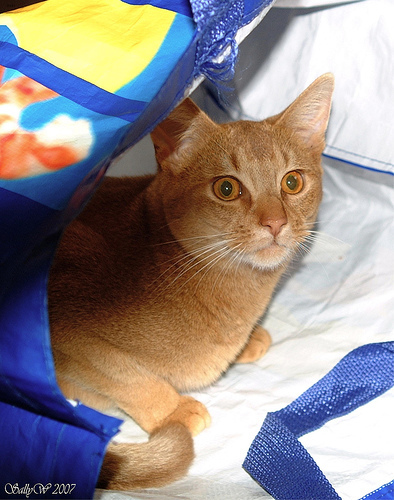

In [54]:

from IPython.display import Image
Image(filename=str(path)+'/Abyssinian_100.jpg') 

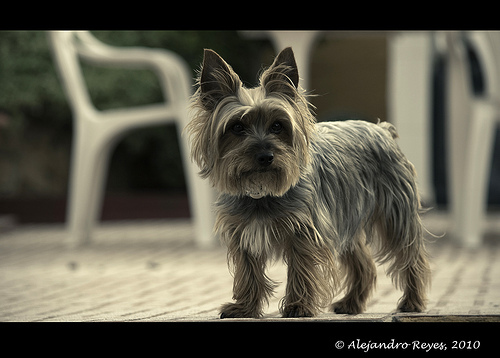

In [8]:
Image(filename=str(path)+'/yorkshire_terrier_99.jpg') 

In [9]:
# Definimos nuestras etiquetas 

In [10]:
def is_cat(x): return x[0].isupper()


In [11]:
%%bash
cd /root/.fastai/data/oxford-iiit-pet/images
ls | head -3 
ls | tail -3

Abyssinian_100.jpg
Abyssinian_100.mat
Abyssinian_101.jpg
yorkshire_terrier_98.jpg
yorkshire_terrier_99.jpg
yorkshire_terrier_9.jpg


In [12]:
%%bash
cd /root/.fastai/data/oxford-iiit-pet/images
ls | cut -d '_' -f1 | uniq -c

    203 Abyssinian
    400 american
    200 basset
    200 beagle
    200 Bengal
    200 Birman
    200 Bombay
    200 boxer
    200 British
    200 chihuahua
    200 Egyptian
    400 english
    200 german
    200 great
    200 havanese
    200 japanese
    200 keeshond
    200 leonberger
    200 Maine
    200 miniature
    200 newfoundland
    200 Persian
    200 pomeranian
    200 pug
    200 Ragdoll
    200 Russian
    200 saint
    200 samoyed
    199 scottish
    200 shiba
    200 Siamese
    200 Sphynx
    191 staffordshire
    200 wheaten
    200 yorkshire


In [13]:

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))


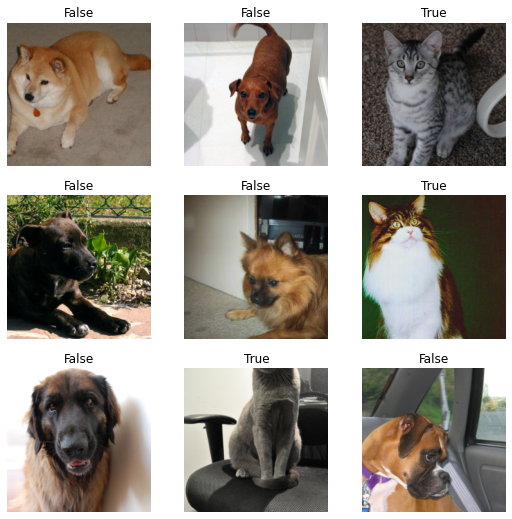

In [14]:

dls.show_batch()

In [15]:
%%bash
cd /root/.fastai/data/oxford-iiit-pet/images
ls | wc -l

7393


In [16]:
print(7390*.2, 7390*.8)

1478.0 5912.0


In [17]:
len(dls.valid_ds.items)

1478

In [18]:
len(dls.train.items)

5912

In [19]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [20]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.164163,0.022753,0.006766,01:50


epoch,train_loss,valid_loss,error_rate,time
0,0.047357,0.011165,0.005413,02:21


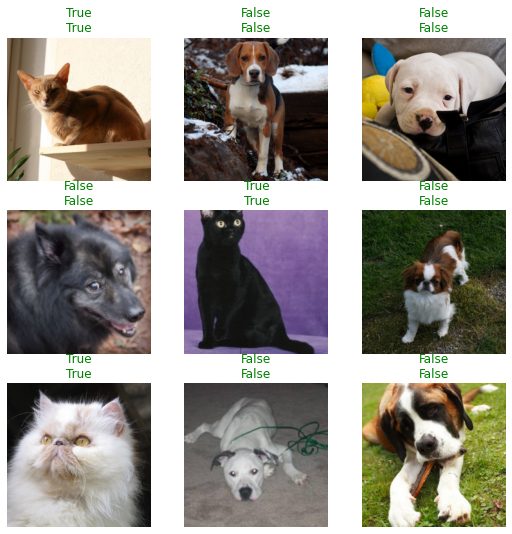

In [21]:
learn.show_results()

### Sidebar: This Book Was Written in Jupyter Notebooks

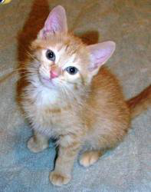

In [23]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [24]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [25]:
#hide
# For the book, we can't actually click an upload button, so we fake it
#uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [26]:
#uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [76]:
#img = PILImage.create(uploader.data[0])
#img.to_thumb(19)

In [105]:
import urllib.request

from PIL import Image as ImagePIL

def obtener_imagen(url):
  urllib.request.urlretrieve(url, "miau_no_miau.jpg")

  img = ImagePIL.open("miau_no_miau.jpg")
  img = PILImage.create(np.array(img.convert("RGB")))
  return img


def predecir(img):
  is_cat,_,probs = learn.predict(img)
  print(f"Is this a cat?: {is_cat}.")
  print(f"Probability it's a cat: {probs[1].item():.6f}")

# Test con mi gato (Senna)

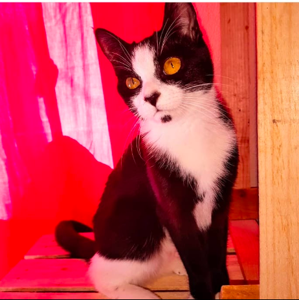

In [109]:
url = "https://raw.githubusercontent.com/emarquezz/APBI/main/Senna.png"
img = obtener_imagen(url)
img.to_thumb(300)


In [110]:
predecir(img)

Is this a cat?: True.
Probability it's a cat: 1.000000


# Test con mi perro (Freya)


In [111]:

url = "https://raw.githubusercontent.com/emarquezz/APBI/main/Freya.png"

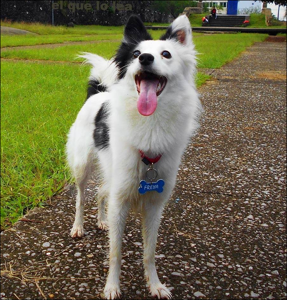

In [112]:
img = obtener_imagen(url)
img.to_thumb(300)


In [113]:
predecir(img)

Is this a cat?: False.
Probability it's a cat: 0.000037


----------

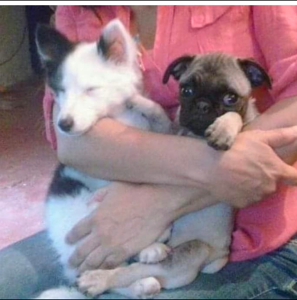

In [114]:
url = "https://raw.githubusercontent.com/emarquezz/APBI/main/Freya_Pug.png"
img = obtener_imagen(url)
img.to_thumb(300)


In [115]:
predecir(img)

Is this a cat?: False.
Probability it's a cat: 0.000052


---------

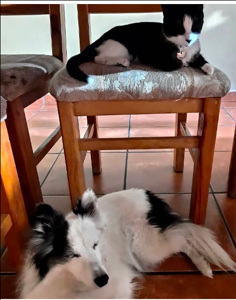

In [116]:
url = "https://raw.githubusercontent.com/emarquezz/APBI/main/Freya_Senna.png"
img = obtener_imagen(url)
img.to_thumb(300)


In [117]:
predecir(img)

Is this a cat?: False.
Probability it's a cat: 0.090020


---------

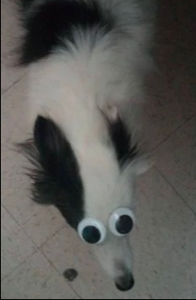

In [118]:
url = "https://raw.githubusercontent.com/emarquezz/APBI/main/Freya_rara.png"
img = obtener_imagen(url)
img.to_thumb(300)


In [119]:
predecir(img)

Is this a cat?: True.
Probability it's a cat: 0.999629


# Test con sus imágenes 

In [ ]:
url = ""
img = obtener_imagen(url)
img.to_thumb(300)


In [ ]:
predecir(img)

In [ ]:
url = ""
img = obtener_imagen(url)
img.to_thumb(300)


In [ ]:
predecir(img)

# Clasificación razas

In [130]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [131]:
Path.BASE_PATH = path
path.ls()



(#2) [Path('images'),Path('annotations')]

In [132]:
(path/"images").ls()


(#7393) [Path('images/beagle_152.jpg'),Path('images/Persian_31.jpg'),Path('images/Birman_97.jpg'),Path('images/Siamese_46.jpg'),Path('images/american_pit_bull_terrier_40.jpg'),Path('images/Sphynx_91.jpg'),Path('images/Persian_170.jpg'),Path('images/leonberger_188.jpg'),Path('images/japanese_chin_128.jpg'),Path('images/Abyssinian_97.jpg')...]

In [133]:

fname = (path/"images").ls()[0]

In [134]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['beagle']

In [135]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


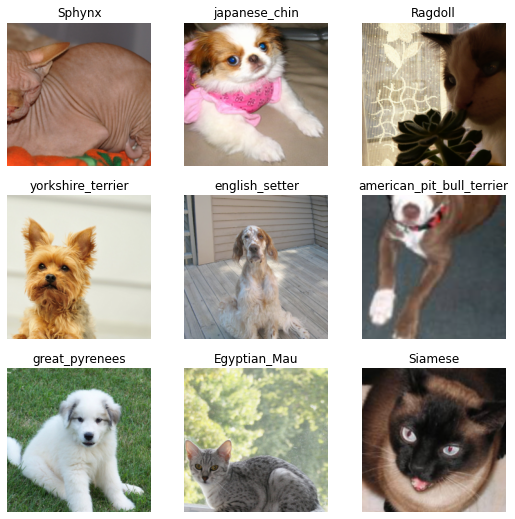

In [137]:

dls.show_batch()

In [141]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.506872,0.345250,0.108931,02:07


epoch,train_loss,valid_loss,error_rate,time
0,0.506205,0.298564,0.095399,02:43
1,0.328187,0.204056,0.068336,02:44


In [167]:

def predecir_raza(img):
  raza,_,probs = learn.predict(img)
  print(f"Raza: {raza}.")


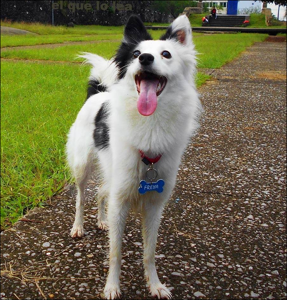

In [168]:

url = "https://raw.githubusercontent.com/emarquezz/APBI/main/Freya.png"
img = obtener_imagen(url)
img.to_thumb(300)


In [169]:
predecir_raza(img)

Raza: samoyed.


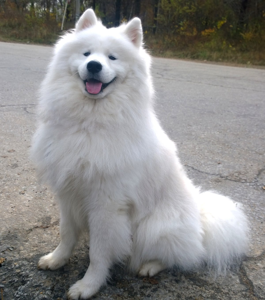

In [146]:


url = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/11.10.2015_Samoyed_%28cropped%29.jpg/1200px-11.10.2015_Samoyed_%28cropped%29.jpg"
img = obtener_imagen(url)
img.to_thumb(300)

---------

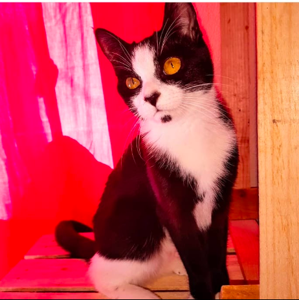

In [170]:
url = "https://raw.githubusercontent.com/emarquezz/APBI/main/Senna.png"
img = obtener_imagen(url)
img.to_thumb(300)


In [171]:
predecir_raza(img)

Raza: Bombay.


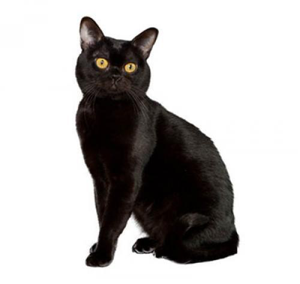

In [172]:


url = "https://www.purina.es/sites/default/files/styles/nppe_breed_selector_500/public/breed_library/cat_bombay.jpg?itok=PAwKoEqA"
img = obtener_imagen(url)
img.to_thumb(300)

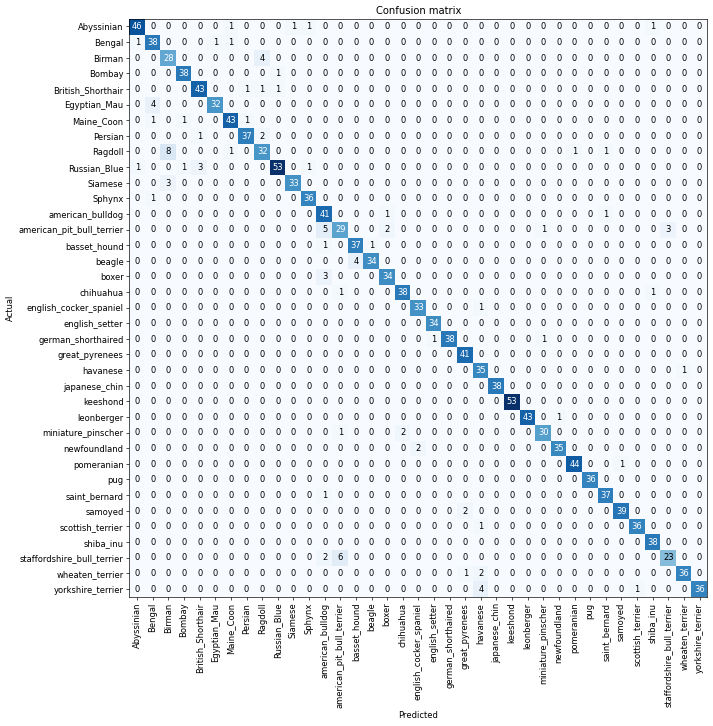

In [163]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

----

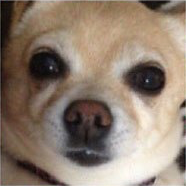

In [177]:
url = "https://www.topbots.com/downloads/code/vision/chihuahua_vs_muffin/test12.png"
img = obtener_imagen(url)
img.to_thumb(300)

In [178]:
predecir_raza(img)

Raza: chihuahua.


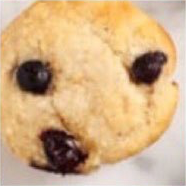

In [173]:
url = "https://www.topbots.com/downloads/code/vision/chihuahua_vs_muffin/test13.png"
img = obtener_imagen(url)
img.to_thumb(300)


In [174]:
predecir_raza(img)

Raza: pug.


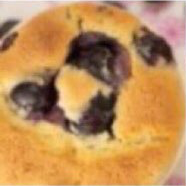

In [188]:
url = "https://www.topbots.com/downloads/code/vision/chihuahua_vs_muffin/test10.png"
img = obtener_imagen(url)
img.to_thumb(300)


In [189]:
predecir_raza(img)

Raza: pomeranian.


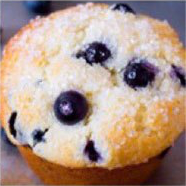

In [190]:

url = "https://www.topbots.com/downloads/code/vision/chihuahua_vs_muffin/test11.png"
img = obtener_imagen(url)
img.to_thumb(300)


In [191]:

predecir_raza(img)

Raza: yorkshire_terrier.


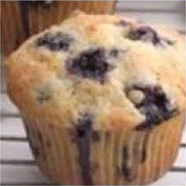

In [193]:

url = "https://www.topbots.com/downloads/code/vision/chihuahua_vs_muffin/test16.png"
img = obtener_imagen(url)
img.to_thumb(300)


In [194]:
predecir_raza(img)

Raza: Bengal.
